<a href="https://colab.research.google.com/github/sambit9238/DataScience/blob/master/fraud_invention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import itertools
%matplotlib inline

In [0]:
!wget https://snap.stanford.edu/data/soc-sign-bitcoinotc.csv.gz
!gunzip -k soc-sign-bitcoinotc.csv.gz

--2019-05-27 14:05:28--  https://snap.stanford.edu/data/soc-sign-bitcoinotc.csv.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 397258 (388K) [application/x-gzip]
Saving to: ‘soc-sign-bitcoinotc.csv.gz’

soc-sign-bitcoinotc 100%[===================>] 387.95K   609KB/s    in 0.6s    

2019-05-27 14:05:29 (609 KB/s) - ‘soc-sign-bitcoinotc.csv.gz’ saved [397258/397258]



In [0]:
!wget https://snap.stanford.edu/data/soc-sign-bitcoinalpha.csv.gz
!gunzip -k soc-sign-bitcoinalpha.csv.gz

--2019-05-27 14:05:37--  https://snap.stanford.edu/data/soc-sign-bitcoinalpha.csv.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149480 (146K) [application/x-gzip]
Saving to: ‘soc-sign-bitcoinalpha.csv.gz’

soc-sign-bitcoinalp 100%[===================>] 145.98K   409KB/s    in 0.4s    

2019-05-27 14:05:37 (409 KB/s) - ‘soc-sign-bitcoinalpha.csv.gz’ saved [149480/149480]



In [0]:
!ls

sample_data		      soc-sign-bitcoinotc.csv
soc-sign-bitcoinalpha.csv     soc-sign-bitcoinotc.csv.gz
soc-sign-bitcoinalpha.csv.gz


In [2]:
!wget https://github.com/Jhird/TrustKeeper/raw/master/1_ORIGINAL_NETWORK.csv
!wget https://github.com/Jhird/TrustKeeper/raw/master/2_TRIMMED_NETWORK.csv
#!wget https://github.com/Jhird/TrustKeeper/blob/master/3_TEST_NETWORK.csv

--2019-05-27 15:12:11--  https://github.com/Jhird/TrustKeeper/raw/master/1_ORIGINAL_NETWORK.csv
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Jhird/TrustKeeper/master/1_ORIGINAL_NETWORK.csv [following]
--2019-05-27 15:12:11--  https://raw.githubusercontent.com/Jhird/TrustKeeper/master/1_ORIGINAL_NETWORK.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1973980 (1.9M) [text/plain]
Saving to: ‘1_ORIGINAL_NETWORK.csv’

1_ORIGINAL_NETWORK. 100%[===================>]   1.88M  --.-KB/s    in 0.05s   

2019-05-27 15:12:11 (35.8 MB/s) - ‘1_ORIGINAL_NETWORK.csv’ saved [1973980/1973980]

--2019-05-27 1

In [3]:
!ls

1_ORIGINAL_NETWORK.csv	2_TRIMMED_NETWORK.csv  sample_data


In [0]:
#Preprocessing the transaction data

In [5]:
trim_network = pd.read_csv('2_TRIMMED_NETWORK.csv')
trim_network.head()

,SOURCE,TARGET,RATING,TIMESTAMP,EPISODE
0,35,3952,1,1.365623e+09,21958
1,2125,5379,-1,1.392045e+09,32086
2,5227,5854,1,1.417038e+09,35751
3,6013,13492,-1,1.393304e+09,32395
4,6013,13495,-1,1.392008e+09,32075


In [6]:
trim_network.shape

(49822, 5)

In [0]:
#extract node features
def GetNodeFeatures(GDF,n):
    if n==0:
        return ['in_degree','pos_in_edges','neg_in_edges','out_degree','pos_out_edges','neg_out_edges']
    # Get sub-dataframes
    outgoing = GDF[GDF['SOURCE']==n].copy().reset_index(drop=True)
    incoming = GDF[GDF['TARGET']==n].copy().reset_index(drop=True)
    
    # Compute node degree (incoming)
    in_degree = len(incoming)
    
    # Compute node degree (outgoing)
    out_degree = len(outgoing)
    
    # Compute number of incoming nodes with positive ratings
    pos_in_edges = len([i for i in incoming.RATING.values if i>0])
    
    # Computer number of incoming nodes with negative ratings
    neg_in_edges = len([i for i in incoming.RATING.values if i<0])
    
    # Repeat for outgoing edges
    pos_out_edges = len([i for i in outgoing.RATING.values if i>0])
    
    # Computer number of outgoing nodes with negative ratings
    neg_out_edges = len([i for i in outgoing.RATING.values if i<0])
    
    return np.array([in_degree,pos_in_edges,neg_in_edges,out_degree,pos_out_edges,neg_out_edges])

In [0]:
# Define list of nodes and sort it in ascending order
nodes = list( set(trim_network['SOURCE']) | set(trim_network['TARGET']) )
nodes.sort()

In [9]:
len(nodes)

9664

In [0]:
# The node feature matrix creation
NF = np.zeros([len(nodes),6])
for i,n in enumerate(nodes):
    NF[i,:] = np.array(GetNodeFeatures(trim_network,n))

In [0]:
# Create a dataframe containing all these node features
NF_df = pd.DataFrame(columns=GetNodeFeatures(trim_network,0),data=NF,index=nodes)
NF_df.to_csv('trimmed_node_features.csv')

In [0]:
NF_df = pd.read_csv('trimmed_node_features.csv',index_col=0)

In [13]:
NF_df.head()

,in_degree,pos_in_edges,neg_in_edges,out_degree,pos_out_edges,neg_out_edges
1,198.0,198.0,0.0,184.0,177.0,7.0
2,36.0,35.0,1.0,36.0,34.0,2.0
3,20.0,11.0,9.0,0.0,0.0,0.0
4,40.0,40.0,0.0,52.0,49.0,3.0
5,3.0,3.0,0.0,2.0,2.0,0.0


In [0]:
f = open('trimmed_network.edgelist','w')
for i in range(len(trim_network)):
    s = str(trim_network['SOURCE'][i])
    t = str(trim_network['TARGET'][i])
    f.write(s+' '+t+'\n')
f.close()

In [15]:
len(trim_network)

49822

In [16]:
!git clone https://github.com/Jhird/TrustKeeper.git

Cloning into 'TrustKeeper'...
remote: Enumerating objects: 134, done.
remote: Total 134 (delta 0), reused 0 (delta 0), pack-reused 134
Receiving objects: 100% (134/134), 9.73 MiB | 22.05 MiB/s, done.
Resolving deltas: 100% (43/43), done.


In [17]:
!ls

1_ORIGINAL_NETWORK.csv	sample_data		  trimmed_node_features.csv
2_TRIMMED_NETWORK.csv	trimmed_network.edgelist  TrustKeeper


In [24]:
!python ./TrustKeeper/node2vec/src/main.py --input ./trimmed_network.edgelist  \
                               --output ./trimmed_network.emb \
                               --dimensions 14 --num-walks 25 --iter 15

Walk iteration:
1 / 25
2 / 25
3 / 25
4 / 25
5 / 25
6 / 25
7 / 25
8 / 25
9 / 25
10 / 25
11 / 25
12 / 25
13 / 25
14 / 25
15 / 25
16 / 25
17 / 25
18 / 25
19 / 25
20 / 25
21 / 25
22 / 25
23 / 25
24 / 25
25 / 25
Traceback (most recent call last):
  File "./TrustKeeper/node2vec/src/main.py", line 104, in <module>
    main(args)
  File "./TrustKeeper/node2vec/src/main.py", line 100, in main
    learn_embeddings(walks)
  File "./TrustKeeper/node2vec/src/main.py", line 87, in learn_embeddings
    model = Word2Vec(walks, size=args.dimensions, window=args.window_size, min_count=0, sg=1, workers=args.workers, iter=args.iter)
  File "/usr/local/lib/python2.7/dist-packages/gensim/models/word2vec.py", line 767, in __init__
    fast_version=FAST_VERSION)
  File "/usr/local/lib/python2.7/dist-packages/gensim/models/base_any2vec.py", line 763, in __init__
    end_alpha=self.min_alpha, compute_loss=compute_loss)
  File "/usr/local/lib/python2.7/dist-packages/gensim/models/word2vec.py", line 892, in train

In [0]:
!ls

1_ORIGINAL_NETWORK.csv	      soc-sign-bitcoinalpha.csv.gz.1
1_ORIGINAL_NETWORK.csv.1      soc-sign-bitcoinotc.csv
2_TRIMMED_NETWORK.csv	      soc-sign-bitcoinotc.csv.gz
2_TRIMMED_NETWORK.csv.1       soc-sign-bitcoinotc.csv.gz.1
node2vec		      trimmed_network.edgelist
sample_data		      trimmed_network.emb
soc-sign-bitcoinalpha.csv     trimmed_node_features.csv
soc-sign-bitcoinalpha.csv.gz  TrustKeeper


In [0]:
#format dictionary like node : embedding
n = []
e = []
with open('./TrustKeeper/trimmed_network.emb') as fin:
    for line in fin:
        node_emb = line.strip().split()
        n.append(node_emb[0])
        e.append(node_emb[1:])

In [31]:
len(e)

9665

In [19]:
n = n[1:]
n = [int(i) for i in n]
embs = np.zeros([len(e)-1,14])
for i in range(1,len(e)):
    embs[i-1] = e[i]
embs.shape

(9664, 14)

In [0]:
#2d projection using t-sne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0)
proj = tsne.fit_transform(embs)
np.save('trimmed_network_tSNE_projection.npy',proj)

Text(0.5,1,'2-dimensional mapping with t-SNE of Bitcoin network nodes with Node2Vec')

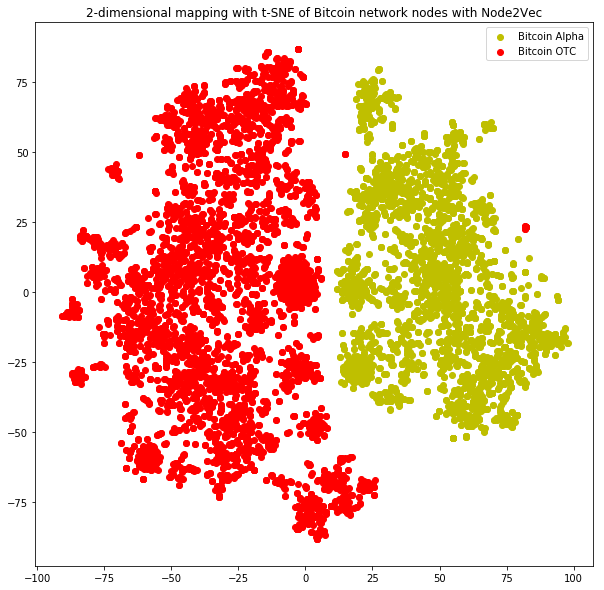

In [23]:
#Plot
proj = np.load('trimmed_network_tSNE_projection.npy')

alpha_nodes = []
otc_nodes = []
for i in range(len(n)):
    if n[i] > 6005:
        alpha_nodes.append(i)
    else:
        otc_nodes.append(i)
        
plt.figure(figsize=(10,10))
alpha = proj[alpha_nodes,:]
otc = proj[otc_nodes,:]
plt.scatter(alpha[:,0],alpha[:,1],c='y',label='Bitcoin Alpha')
plt.scatter(otc[:,0],otc[:,1],c='r',label='Bitcoin OTC')
plt.legend()
plt.title('2-dimensional mapping with t-SNE of Bitcoin network nodes with Node2Vec')

In [24]:
#Feature matrix creation
NF_matrix = np.zeros([len(n),20]) #14 Node2Vec features + 6 features extracted from the rating network
for i in range(len(n)):
    NF_matrix[i] = np.concatenate([embs[i],np.log2(NF_df.loc[n[i]].values + 1)])
NF_matrix.shape

(9664, 20)

In [0]:
#normalizing feature matrix
NF_matrix_mean = np.mean(NF_matrix,axis=0)
NF_matrix_std = np.std(NF_matrix,axis=0)
NF_matrix_norm = ( NF_matrix - NF_matrix_mean ) / ( NF_matrix_std )

In [0]:
NF_matrix_std.shape

In [31]:
emb_df_norm = pd.DataFrame(columns=list(range(1,21)),index=n,data=NF_matrix_norm)
emb_df_norm.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
35,-1.774256,-0.448314,0.047397,0.612565,0.797896,-0.789905,-0.051981,-0.121641,-0.866701,0.772711,-0.960294,-0.634862,-0.391693,0.070921,5.995989,5.966601,-0.403738,5.764529,5.928494,5.244485
6006,-0.501574,-0.084692,0.723285,-1.407241,-0.649710,1.117009,0.567946,0.082475,-0.241229,-1.279825,0.483483,-0.937666,-1.084376,0.990163,5.628302,5.607510,-0.403738,5.253367,5.415542,2.245152
2642,-1.139167,-0.513084,1.118884,0.059454,-0.080315,-0.162173,0.315040,0.686051,0.649060,1.255844,-0.181627,0.228191,0.024559,-0.302619,5.577683,5.554465,1.132302,5.057479,5.198008,4.509349
2125,0.168152,0.876179,-0.513470,-0.215777,-0.248220,-0.916373,-0.365312,0.893897,0.826803,0.918575,-0.683717,1.040111,1.754360,-0.239251,4.613721,4.616648,-0.403738,5.057479,4.230008,12.063567
1810,0.072147,0.400560,0.326883,-0.186649,1.174607,-0.715021,-0.125926,1.679218,-0.296529,0.525661,-0.017292,0.255513,0.899269,0.118267,5.310770,5.124245,7.598189,5.026762,4.650978,11.015487


In [0]:
emb_df_norm.to_csv('./trimmed_node_embeddings_mean_normalized.csv')

In [0]:
emb_df_norm = pd.read_csv('./trimmed_node_embeddings_mean_normalized.csv', index_col=0)

In [0]:
#X, y prep
X = np.zeros([len(trim_network),40])
y = np.zeros(len(trim_network))
for i in range(len(trim_network)):
    s = trim_network['SOURCE'][i]
    t = trim_network['TARGET'][i]
    r = trim_network['RATING'][i]
    left = emb_df_norm.loc[s,:].values
    right = emb_df_norm.loc[t,:].values
    X[i,:] = np.concatenate([left,right])
    if r>0:
        y[i] = 0 # If not fraud
    else:
        y[i] = 1 # If fraud

In [34]:
!wget https://raw.githubusercontent.com/Jhird/TrustKeeper/master/3_TEST_NETWORK.csv

--2019-05-27 15:25:40--  https://raw.githubusercontent.com/Jhird/TrustKeeper/master/3_TEST_NETWORK.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 328790 (321K) [text/plain]
Saving to: ‘3_TEST_NETWORK.csv’

3_TEST_NETWORK.csv  100%[===================>] 321.08K  --.-KB/s    in 0.03s   

2019-05-27 15:25:41 (10.4 MB/s) - ‘3_TEST_NETWORK.csv’ saved [328790/328790]



In [35]:
!ls

1_ORIGINAL_NETWORK.csv	  trimmed_network_tSNE_projection.npy
2_TRIMMED_NETWORK.csv	  trimmed_node_embeddings_mean_normalized.csv
3_TEST_NETWORK.csv	  trimmed_node_features.csv
sample_data		  TrustKeeper
trimmed_network.edgelist


In [0]:
val_network = pd.read_csv('3_TEST_NETWORK.csv')
X_val = np.zeros([len(val_network),40])
y_val = np.zeros(len(val_network))
for i in range(len(val_network)):
    s = val_network['SOURCE'][i]
    t = val_network['TARGET'][i]
    r = val_network['RATING'][i]
    left = emb_df_norm.loc[s,:].values
    right = emb_df_norm.loc[t,:].values
    X_val[i,:] = np.concatenate([left,right])
    if r>0:
        y_val[i] = 0 
    else:
        y_val[i] = 1 # fraud (class imbalance)

In [38]:
from collections import Counter
Counter(y)

Counter({0.0: 45604, 1.0: 4218})

In [39]:
Counter(y_val)

Counter({0.0: 9075, 1.0: 881})

In [40]:
# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Deep Learning
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.utils import np_utils
from keras.layers.merge import Concatenate

Using TensorFlow backend.


In [0]:
# Create train and test sets
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size= 0.2,random_state=0)
def CreateSample(frac=0.8):
    fraud_indices = np.array([i for i in range(len(y_train)) if y_train[i]==1])
    not_fraud_indices = np.array([i for i in range(len(y_train)) if y_train[i]==0])
    sample_size = int(np.round( len(fraud_indices) * frac ))
    fraud_sample = np.random.randint(0,len(fraud_indices),sample_size) 
    not_fraud_sample = np.random.randint(0,len(not_fraud_indices),sample_size)
    y_sample = np.concatenate([y_train[fraud_indices][fraud_sample],y_train[not_fraud_indices[not_fraud_sample]]])
    x_sample = np.concatenate([x_train[fraud_indices][fraud_sample],x_train[not_fraud_indices[not_fraud_sample]]])
    return x_sample,y_sample

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [43]:
#Trustkeeper model
input_size = 40 # Features from X matrix

M1 = Sequential()
M1.add(Dense(128, activation='relu', input_shape=(input_size,)))
M1.add(Dense(128, activation='relu'))
M1.add(Dense(64, activation='relu'))
M1.add(Dense(32, activation='relu'))
M1.add(Dense(16, activation='relu'))
M1.add(Dense(1,activation='sigmoid'))
nadam = keras.optimizers.Nadam(lr=1e-6, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)

M1.compile(loss='binary_crossentropy',
              optimizer=nadam,
              metrics=['accuracy'])

# Define parameters
Nepochs = 10

Instructions for updating:
Colocations handled automatically by placer.


In [44]:
sample_x,sample_y = CreateSample()
sample_x.shape

(5396, 40)

In [46]:
Counter(y_train)

Counter({0.0: 36485, 1.0: 3372})

In [47]:
3372*0.8

2697.6000000000004

In [0]:
#Train model using boot straping
for i in range(10):
    sample_x,sample_y = CreateSample()
    M1.fit(sample_x, sample_y, epochs=Nepochs, batch_size=5, verbose=0)

In [68]:
y_pred = M1.predict(x_test)

# Print classfication report
target_names = ['Honest','Fraudulent']
confusion_matrix = cm(y_test, np.round(y_pred))
print("Classification Report for TrustKeeper")
print(classification_report(y_test, np.round(y_pred)))

Classification Report for TrustKeeper
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96      9119
         1.0       0.54      0.92      0.68       846

   micro avg       0.93      0.93      0.93      9965
   macro avg       0.76      0.92      0.82      9965
weighted avg       0.95      0.93      0.93      9965



Normalized confusion matrix
[[0.92586906 0.07413094]
 [0.07801418 0.92198582]]


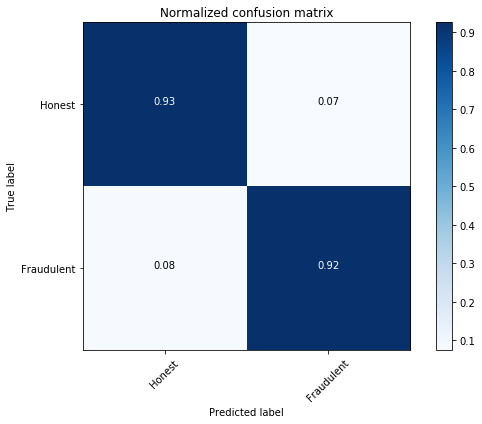

In [69]:
plt.figure(figsize=(8,6))
plot_confusion_matrix(confusion_matrix, classes=target_names, normalize=True,
                      title='Normalized confusion matrix')

In [70]:
y_pred = M1.predict(X_val)
# Print confusion matrix
confusion_matrix = cm(y_val, np.round(y_pred))
print("Classification Report for TrustKeeper (Validation set)")
print(classification_report(y_val, np.round(y_pred)))

Classification Report for TrustKeeper (Validation set)
              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94      9075
         1.0       0.46      0.76      0.57       881

   micro avg       0.90      0.90      0.90      9956
   macro avg       0.72      0.84      0.76      9956
weighted avg       0.93      0.90      0.91      9956



Normalized confusion matrix
[[0.91162534 0.08837466]
 [0.23609535 0.76390465]]


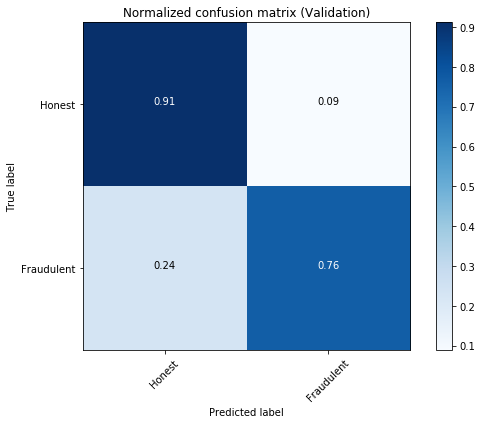

In [71]:
plt.figure(figsize=(8,6))
plot_confusion_matrix(confusion_matrix, classes=target_names, normalize=True,
                      title='Normalized confusion matrix (Validation)')

In [0]:
import pickle
M1.save('TrustKeeper.h5')

In [0]:
#without node2vec
input_size = 12 # Features from X matrix

M2 = Sequential()
M2.add(Dense(128, activation='relu', input_shape=(input_size,)))
M2.add(Dense(128, activation='relu'))
M2.add(Dense(64, activation='relu'))
M2.add(Dense(32, activation='relu'))
M2.add(Dense(16, activation='relu'))
M2.add(Dense(1,activation='sigmoid'))
nadam = keras.optimizers.Nadam(lr=1e-6, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)

M2.compile(loss='binary_crossentropy',
              optimizer=nadam,
              metrics=['accuracy'])

# Define parameters
Nepochs = 10

In [0]:
cols_to_keep = list(range(14,20)) + list(range(34,40))
for i in range(10):
    sample_x,sample_y = CreateSample()
    M2.fit(sample_x[:,cols_to_keep], sample_y, epochs=Nepochs, batch_size=5, verbose=0)

In [76]:
y_pred = M2.predict(x_test[:,cols_to_keep])
# Print classfication report
target_names = ['Honest','Fraudulent']
confusion_matrix = cm(y_test, np.round(y_pred))
print("Classification Report for Model 2 (NN w/o Node2Vec)")
print(classification_report(y_test, np.round(y_pred)))

Classification Report for Model 2 (NN w/o Node2Vec)
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96      9119
         1.0       0.55      0.94      0.70       846

   micro avg       0.93      0.93      0.93      9965
   macro avg       0.77      0.93      0.83      9965
weighted avg       0.96      0.93      0.94      9965



Model 2
Normalized confusion matrix
[[0.92959754 0.07040246]
 [0.06146572 0.93853428]]


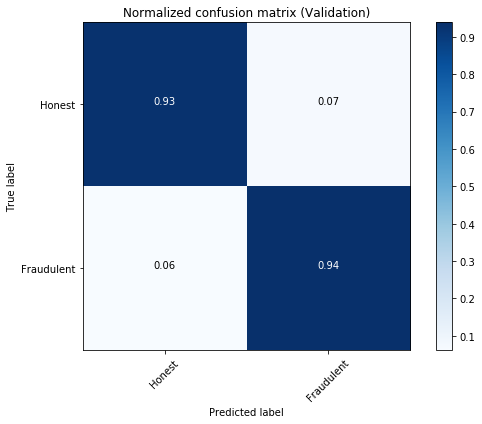

In [77]:
# Plot normalized confusion matrix
print('Model 2')
plt.figure(figsize=(8,6))
plot_confusion_matrix(confusion_matrix, classes=target_names, normalize=True,
                      title='Normalized confusion matrix (Validation)')

In [78]:
y_pred = M2.predict(X_val[:,cols_to_keep])
# Print confusion matrix
confusion_matrix = cm(y_val, np.round(y_pred))
print("Classification Report for TrustKeeper (Validation set)")
print(classification_report(y_val, np.round(y_pred)))

Classification Report for TrustKeeper (Validation set)
              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94      9075
         1.0       0.46      0.76      0.57       881

   micro avg       0.90      0.90      0.90      9956
   macro avg       0.72      0.84      0.76      9956
weighted avg       0.93      0.90      0.91      9956



Normalized confusion matrix
[[0.91449036 0.08550964]
 [0.24177072 0.75822928]]


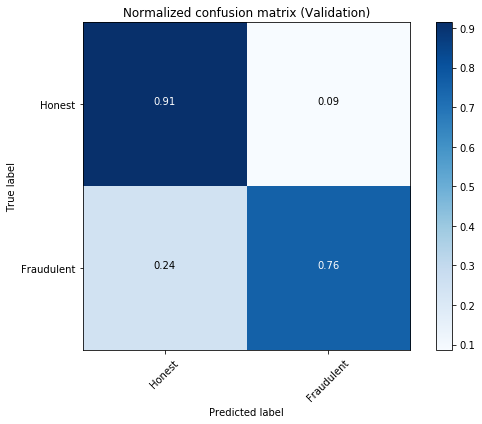

In [79]:
plt.figure(figsize=(8,6))
plot_confusion_matrix(confusion_matrix, classes=target_names, normalize=True,
                      title='Normalized confusion matrix (Validation)')

In [0]:
M2.save('TrustKeeper_no_node2vec.h5')

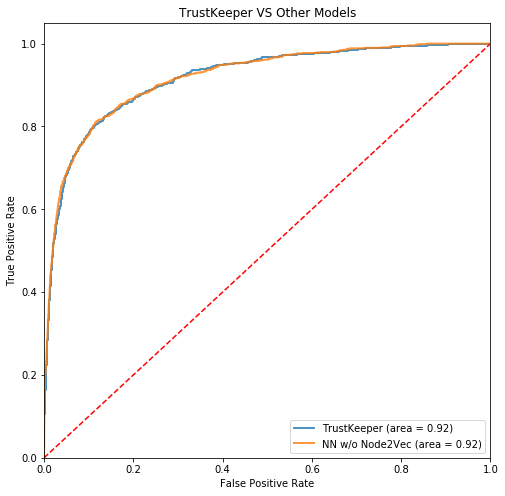

In [80]:
plt.figure(figsize=(8,8))

logit_roc_auc = roc_auc_score(y_val, M1.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, M1.predict_proba(X_val))
plt.plot(fpr, tpr, alpha=0.8, linewidth=2.0,label='TrustKeeper (area = %0.2f)' % (logit_roc_auc))

logit_roc_auc = roc_auc_score(y_val, M2.predict(X_val[:,cols_to_keep]))
fpr, tpr, thresholds = roc_curve(y_val, M2.predict_proba(X_val[:,cols_to_keep]))
plt.plot(fpr, tpr, alpha=0.8, linewidth=2.0,label='NN w/o Node2Vec (area = %0.2f)' % (logit_roc_auc))


plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('TrustKeeper VS Other Models')
plt.legend(loc="lower right")